# Aircraft Price Prediction Notebook

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


## 2. Loading the Dataset

In [2]:
df = pd.read_csv("dataset.csv")
print(df.head())

              Model  Years_Working  Production_Year  Range_km Engine_Type  \
0  Airbus A350-1000              2             2022     15861    Turbofan   
1        Boeing 777             18             2006     16024    Turbofan   
2        Boeing 777             14             2010     15390    Turbofan   
3        Boeing 747              8             2016     13705    Turbofan   
4        Cessna 172             12             2012      1093      Piston   

   Fuel_Consumption  Capacity  Hourly_Maintenance_Cost  Region     Price_USD  
0              5.47       419                   993.68  Europe  2.792722e+08  
1              6.89       398                  4913.46  Europe  1.594972e+08  
2              7.46       387                  1619.02  Africa  1.473324e+08  
3              9.10       670                  1623.69    Asia  2.450766e+08  
4              0.04         4                  4009.92  Europe  2.203259e+05  


## 3. Exploring the Data

,Years_Working,Production_Year,Range_km,Fuel_Consumption,Capacity,Hourly_Maintenance_Cost,Price_USD
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,13.692900,2010.307100,10717.486000,5.610017,387.594300,2751.771319,1.531261e+08
std,9.903161,9.903161,5454.510674,3.999496,270.142867,1301.122653,1.305797e+08
min,0.000000,1990.000000,780.000000,0.040000,4.000000,500.060000,1.000000e+05
25%,5.000000,2003.000000,6336.000000,2.530000,185.000000,1646.855000,3.369454e+07
50%,12.000000,2012.000000,13791.000000,5.190000,396.000000,2736.125000,1.124454e+08
75%,21.000000,2019.000000,15581.000000,9.530000,655.000000,3877.077500,2.653957e+08
max,34.000000,2024.000000,16600.000000,13.200000,860.000000,4999.740000,5.324424e+08


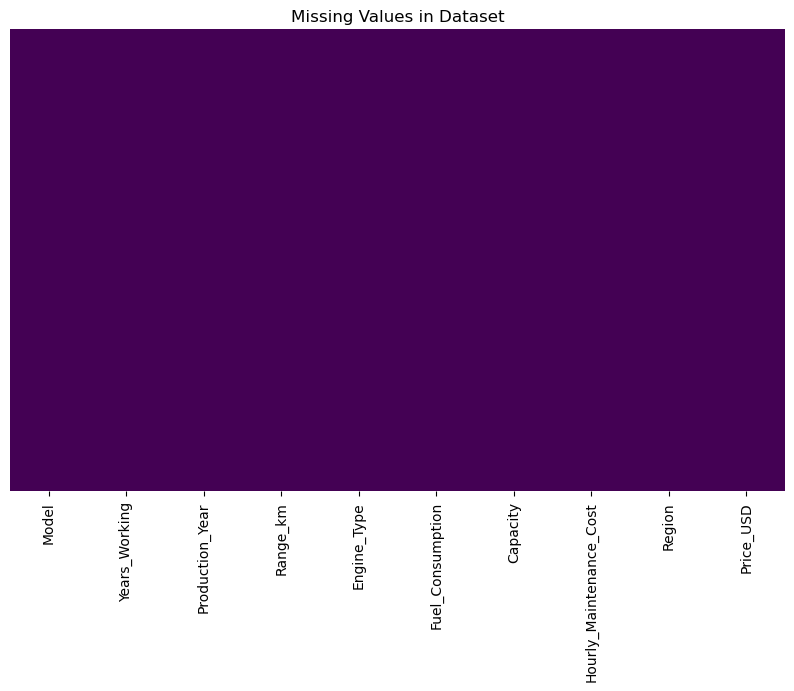

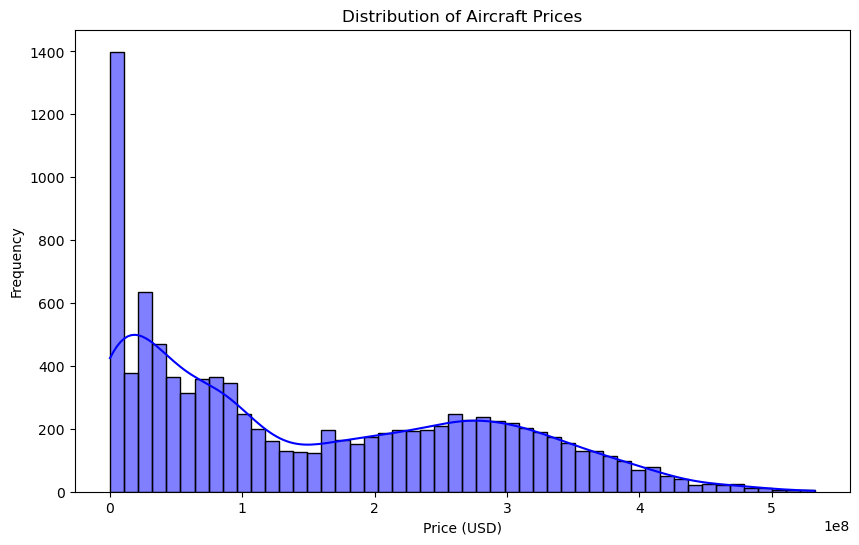

In [3]:
# Display summary statistics
display(df.describe())

# Visualizing missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values in Dataset")
plt.show()

# Visualizing price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["Price_USD"], bins=50, kde=True, color="blue")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.title("Distribution of Aircraft Prices")
plt.show()


## 4. Selecting Numeric Features

In [4]:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
if "Price_USD" in numeric_features:
    numeric_features.remove("Price_USD")

## 5. Feature Correlation Analysis

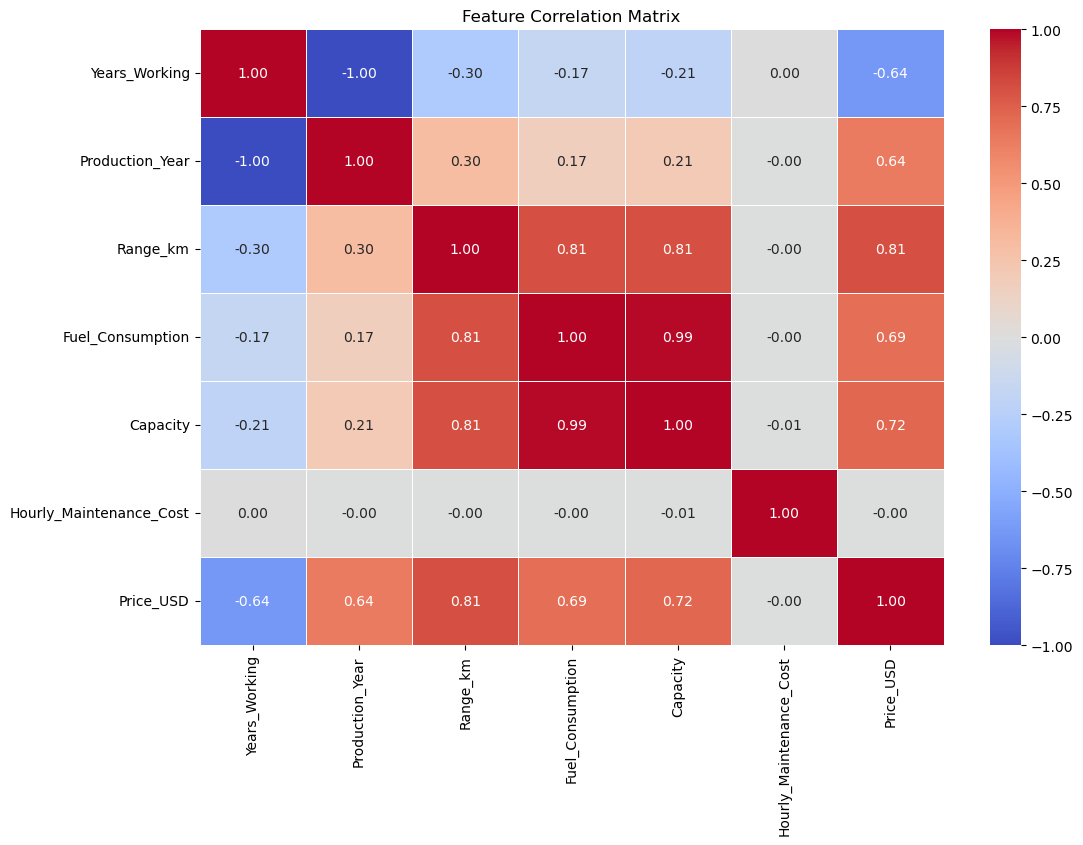

In [5]:
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

## 6. Splitting Data into Train and Test Sets

In [6]:
X = df[numeric_features]
y = df["Price_USD"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 7. Scaling the Data

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 8. Training the Model

In [8]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

## 9. Making Predictions

In [9]:
y_pred = model.predict(X_test_scaled)

## 10. Evaluating the Model

MAE: 16004011.0225278
MSE: 591679197375403.4
RMSE: 24324456.77451818
R2 Score: 0.9658455124826173


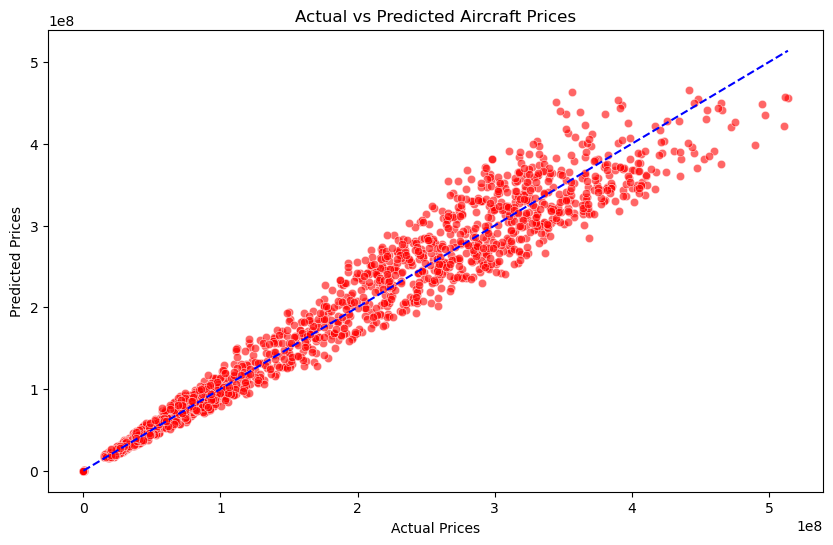

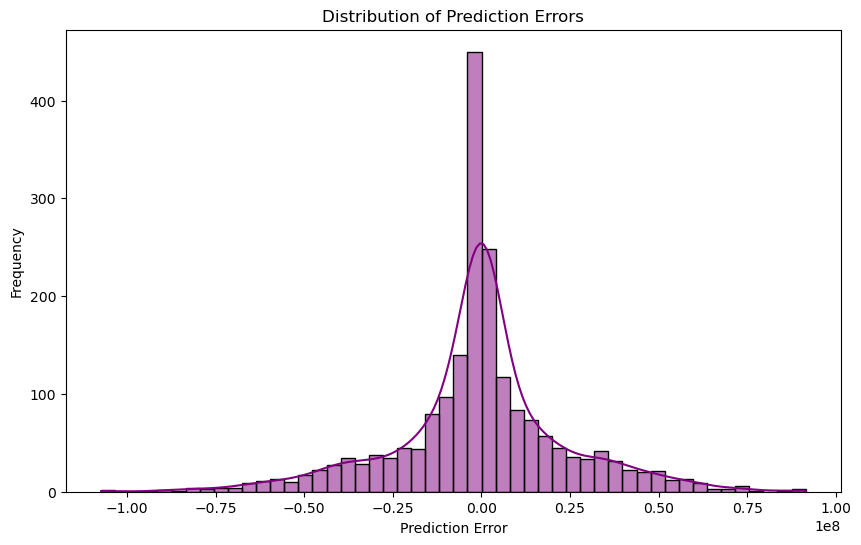

In [10]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

# Visualizing predicted vs actual prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="red")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Aircraft Prices")
plt.show()

# Error distribution
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, bins=50, kde=True, color="purple")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()

## 11. Saving the Model and Scaler

In [11]:
joblib.dump(model, "airplane_price_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']